In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# As seen from dataExtraction, there's no change to the data since it's already clean
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

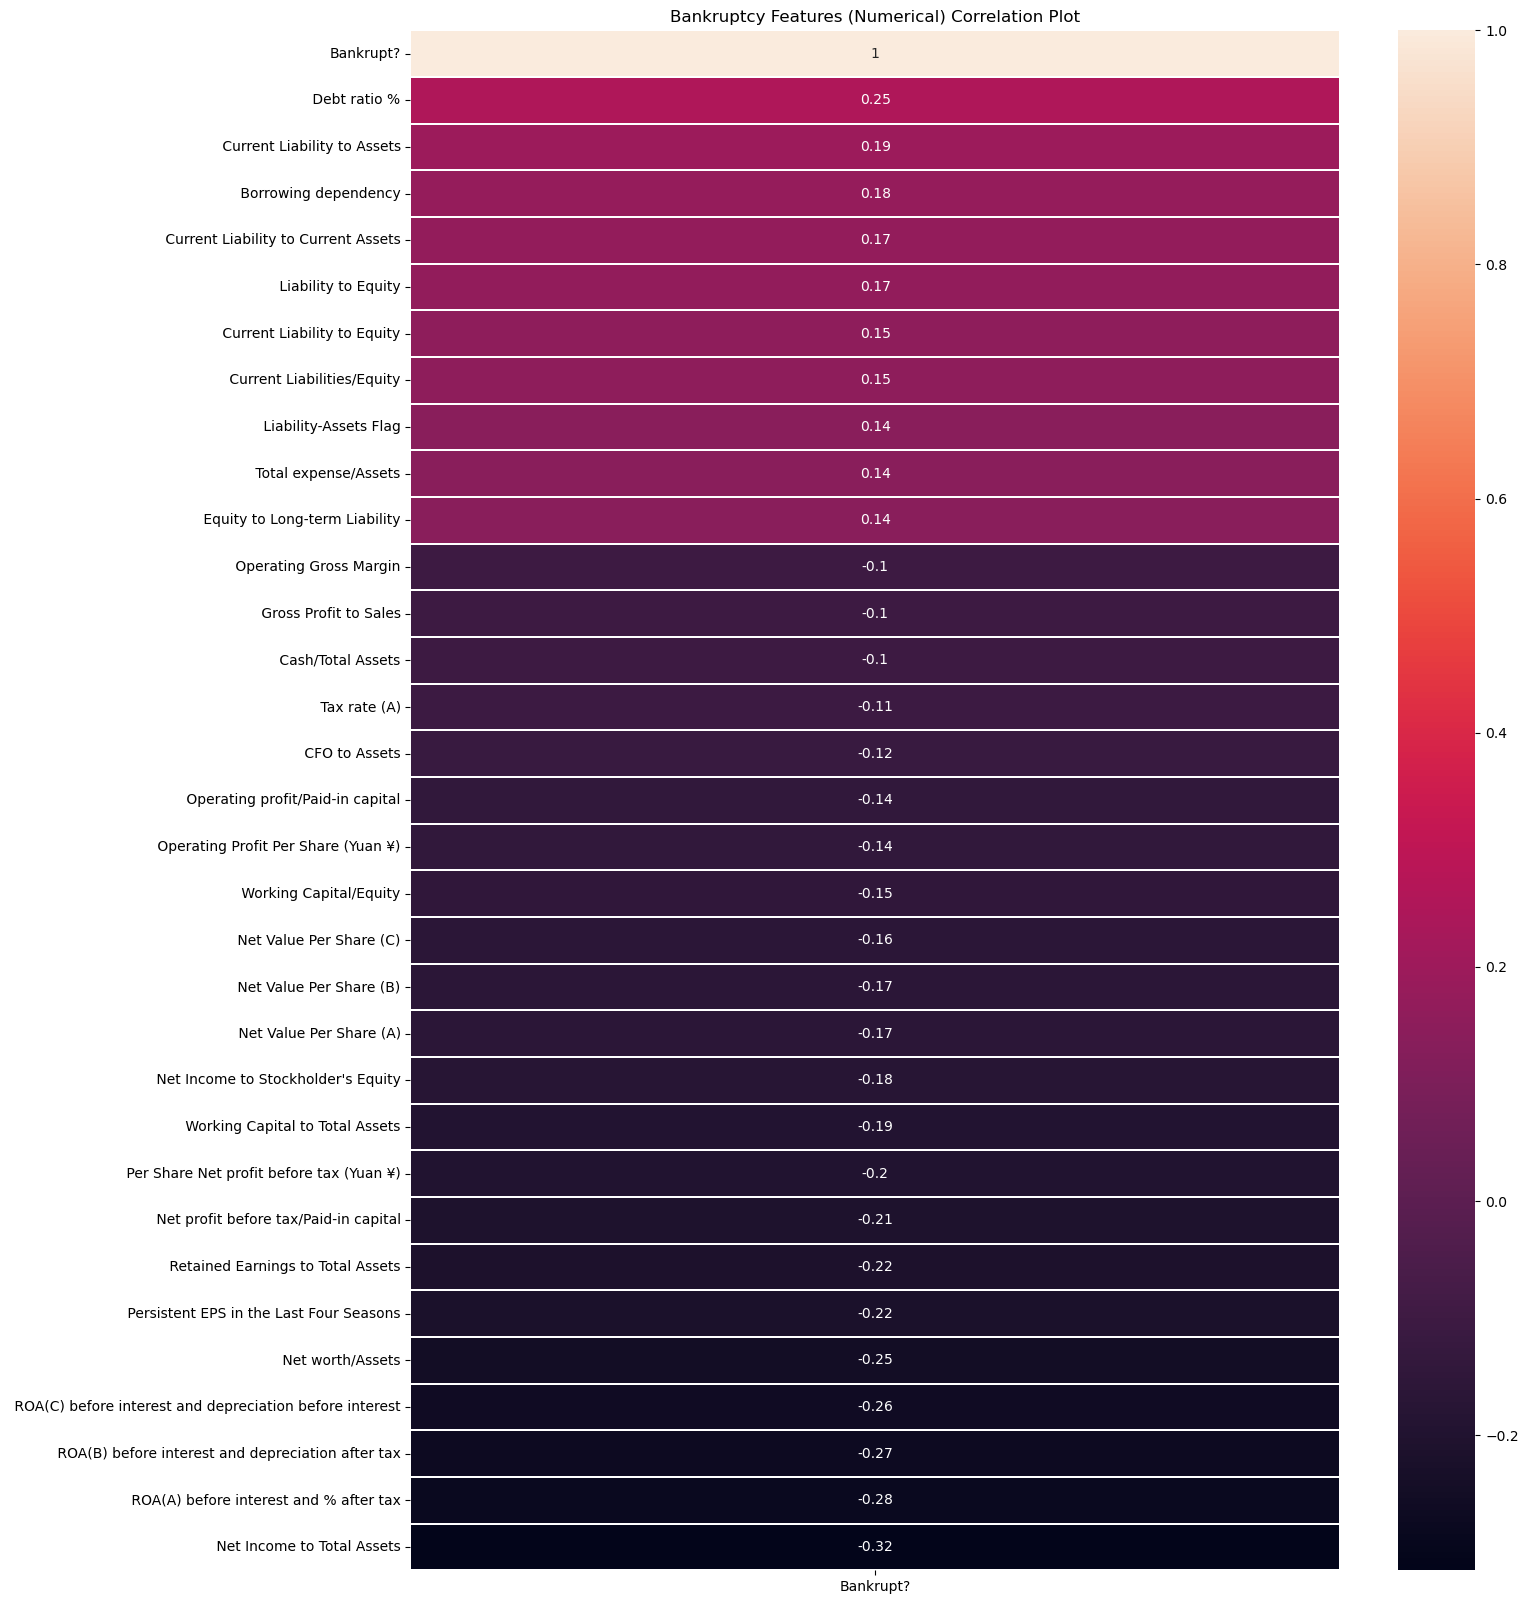

In [4]:
fig, ax = plt.subplots(figsize=(15,20))
plt.title('Bankruptcy Features (Numerical) Correlation Plot')
data_corr = data.corr()[["Bankrupt?"]]
data_corr = data_corr[abs(data_corr["Bankrupt?"]) > 0.1].sort_values("Bankrupt?", ascending = False)
sns.heatmap(data_corr, annot=True, linewidths=.1)
plt.show()

<Axes: title={'center': 'Number of bankrupt companies to Net Worth'}, xlabel='Bankrupt?', ylabel=' Net worth/Assets'>

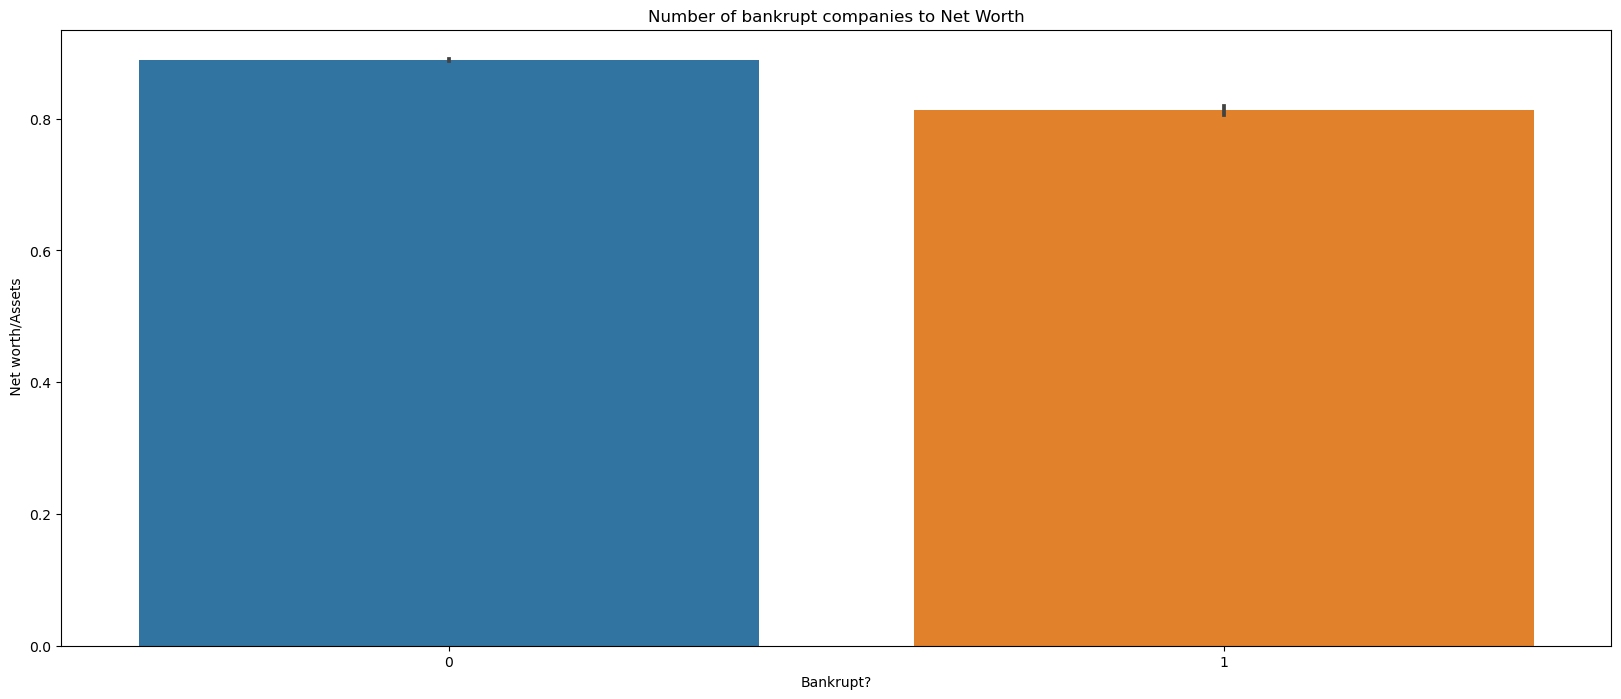

In [5]:
plt.figure(figsize=(20,8))
plt.title('Number of bankrupt companies to Net Worth')
sns.barplot(x="Bankrupt?", y=' Net worth/Assets' ,data=data)

<br>
We can see that the net worth of the company surprisingly does not matter much to whether a company will go bankrupt or not. Ie, even a company with very high networth can go bankrupt just as easily
<br> <br>


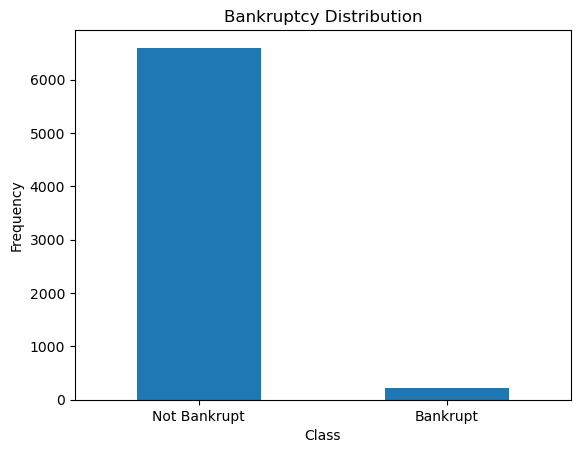

In [6]:
LABELS = ["Not Bankrupt", "Bankrupt"]

count_classes = pd.value_counts(data['Bankrupt?'], sort = 1)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Bankruptcy Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Wow, that's a huge class imbalance. Let's take note and fix that later on using SMOTE.
<br><br>

#### Next lets print the box, histogram and violin plot of the 6 features with the highest correlation coefficient

In [7]:
high_corr = data_corr[abs(data_corr["Bankrupt?"]) > 0.25]
print(high_corr)

                                                    Bankrupt?
Bankrupt?                                            1.000000
 Debt ratio %                                        0.250161
 Net worth/Assets                                   -0.250161
 ROA(C) before interest and depreciation before...  -0.260807
 ROA(B) before interest and depreciation after tax  -0.273051
 ROA(A) before interest and % after tax             -0.282941
 Net Income to Total Assets                         -0.315457


<Axes: >

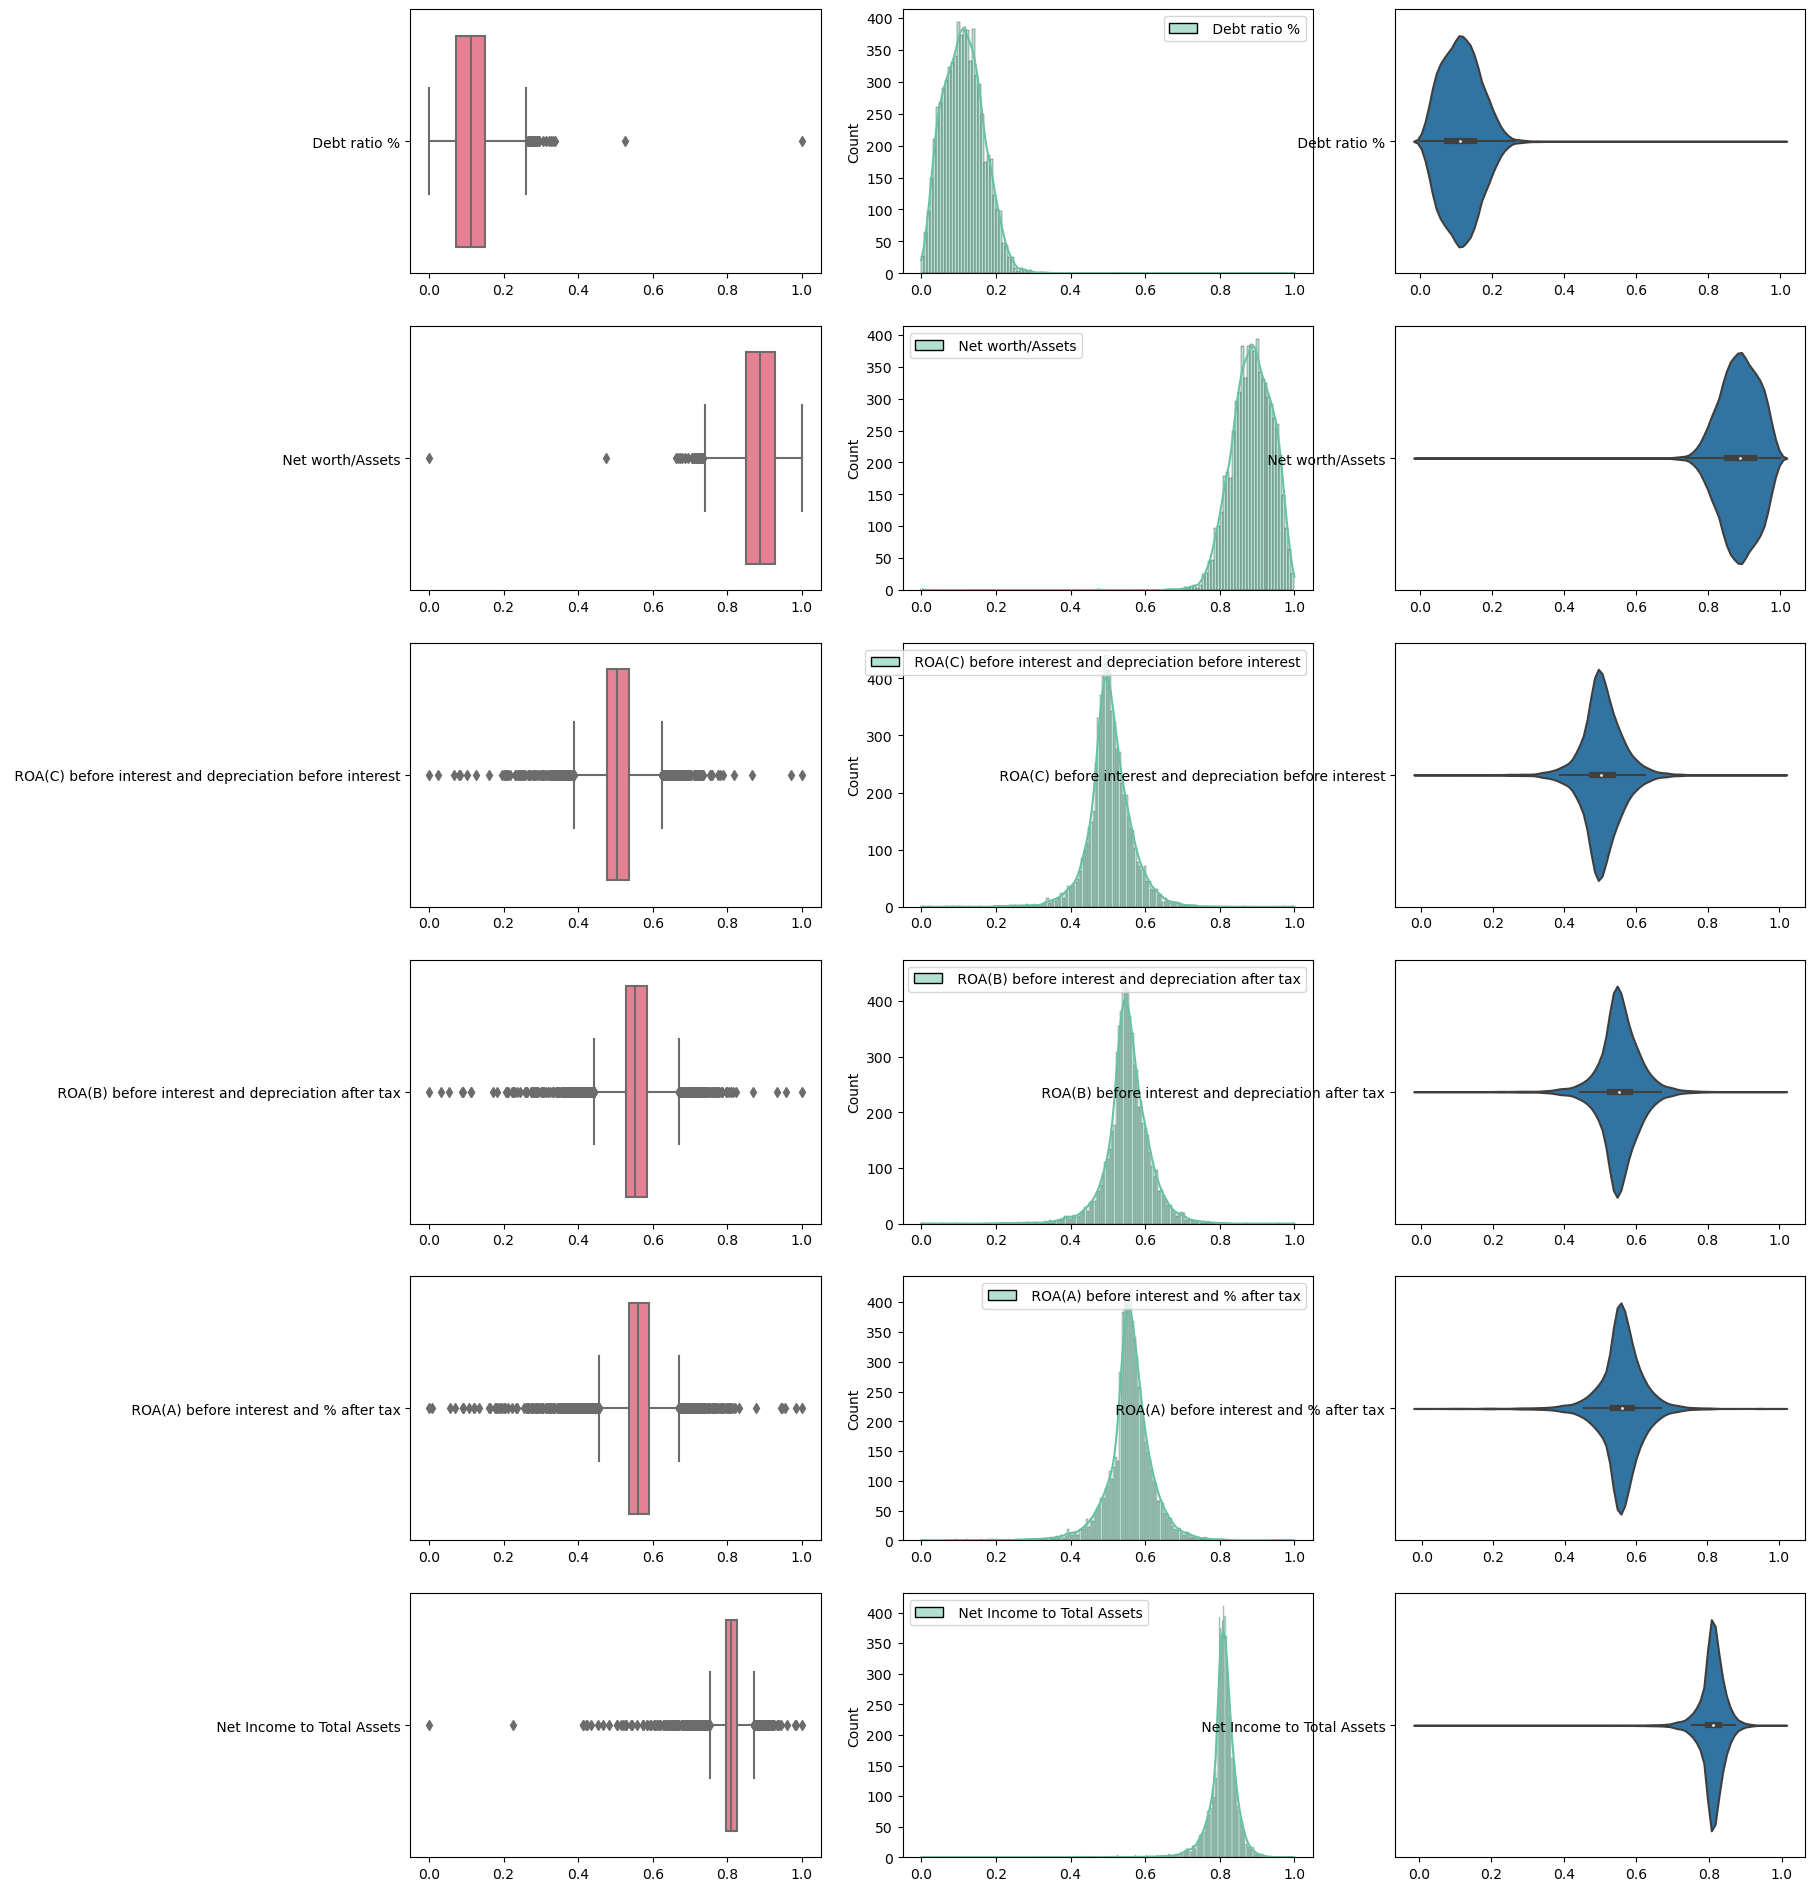

In [8]:
debtRatio = pd.DataFrame(data[" Debt ratio %"])
netWorth = pd.DataFrame(data[" Net worth/Assets"])
ROAC = pd.DataFrame(data[" ROA(C) before interest and depreciation before interest"])
ROAB = pd.DataFrame(data[" ROA(B) before interest and depreciation after tax"])
ROAA = pd.DataFrame(data[" ROA(A) before interest and % after tax"])
netIncometoTotalAssets = pd.DataFrame(data[" Net Income to Total Assets"])

f, axes = plt.subplots(6, 3, figsize=(18, 24))
sns.boxplot(data = debtRatio, orient = "h", ax = axes[0,0], palette='husl')
sns.histplot(data = debtRatio, kde = True, ax = axes[0,1], palette='Set2')
sns.violinplot(data = debtRatio, orient = "h", ax = axes[0,2])
sns.boxplot(data = netWorth, orient = "h", ax = axes[1,0], palette='husl')
sns.histplot(data = netWorth, kde = True, ax = axes[1,1], palette='Set2')
sns.violinplot(data = netWorth, orient = "h", ax = axes[1,2])
sns.boxplot(data = ROAC, orient = "h", ax = axes[2,0], palette='husl')
sns.histplot(data = ROAC, kde = True, ax = axes[2,1], palette='Set2')
sns.violinplot(data = ROAC, orient = "h", ax = axes[2,2])
sns.boxplot(data = ROAB, orient = "h", ax = axes[3,0], palette='husl')
sns.histplot(data = ROAB, kde = True, ax = axes[3,1], palette='Set2')
sns.violinplot(data = ROAB, orient = "h", ax = axes[3,2])
sns.boxplot(data = ROAA, orient = "h", ax = axes[4,0], palette='husl')
sns.histplot(data = ROAA, kde = True, ax = axes[4,1], palette='Set2')
sns.violinplot(data = ROAA, orient = "h", ax = axes[4,2])
sns.boxplot(data = netIncometoTotalAssets, orient = "h", ax = axes[5,0], palette='husl')
sns.histplot(data = netIncometoTotalAssets, kde = True, ax = axes[5,1], palette='Set2')
sns.violinplot(data = netIncometoTotalAssets, orient = "h", ax = axes[5,2])

We can see that there are some outliers, but they are outliers due to the nature of the dataset, therefore we should not remove them.